## 9.1 
Write a python function called $\texttt{isSymmetric}$ which takes a single parameter $\texttt{A}$ and checks if the NumPy matrix $\texttt{A}$ is symmetric. It should return 1 if the matrix is symmetric, and 0 if the matrix is non-symmetric.

## Solution

A matrix $\texttt{A}$ is symmetric if the following is true

$$\textbf{A} = \textbf{A}^T.$$

The transpose of $\texttt{A}$ can be determined by reverting the rows and columns of the matrix. The numpy function $\texttt{transpose}$ can also be employed. Once the transpose of $\texttt{A}$ is determined, an $\texttt{if}$ statement is used to verify if that the tranpose is equal to the original matrix.

Note that to determine if each element of numpy array $\texttt{A}$ is equal to each corresponding element of numpy array $\texttt{B}$, the statement to be used is $\texttt{(A == B).all()}$.

In [1]:
import numpy as np

def isSymmetric(A):
    """Determines if a matrix is symmetric
    
    Args:
        A: numpy matrix
    Returns:
        int: 1 if A is symmetric, 0 if non-symmetric
    """
    
    # Determine size of A
    [Nrow,Ncol] = A.shape
    
    # Continue only if A is a square matrix
    assert (Nrow == Ncol),"A is not square"
    N = Nrow
    
    # Determine A^T
    # Can also use transposeA = np.transpose(A)
    transposeA = np.zeros([N,N])
    for i in range(0,N):
        transposeA[i,:] = A[:,i]
     
    # A is symmetric if A^T = A
    if (transposeA == A).all():
        return 1
    else:
        return 0
        
# Test on a symmetric matrix
A = np.array([(1,7,3),(7,4,-5),(3,-5,6)])*1.0
result = isSymmetric(A)
print('For matrix A:\n',A)
print('Result:',result)

# Test on a non-symmetric matrix
A = np.array([(1,7,5),(7,4,-5),(3,-5,6)])*1.0
result = isSymmetric(A)
print('\nFor matrix A:\n',A)
print('Result:',result)

A = np.array([(1,2,3),(2,4,5),(3,5,6)])
result = isSymmetric(A)
print('\nFor matrix A:\n',A)
print('Result:',result)

For matrix A:
 [[ 1.  7.  3.]
 [ 7.  4. -5.]
 [ 3. -5.  6.]]
Result: 1

For matrix A:
 [[ 1.  7.  5.]
 [ 7.  4. -5.]
 [ 3. -5.  6.]]
Result: 0

For matrix A:
 [[1 2 3]
 [2 4 5]
 [3 5 6]]
Result: 1


##  Exiting Gracefully
The Jacobi and Gauss-Sidel implementations in this chapter have a maximum number of iterations before they return a solution. They do not, however, tell the user that the maximum number of iterations was reached. Modify the Jacobi implementation given above to alert the user that the maximum number of iterations has been reached. You can do this by inserting a $\texttt{print}$ statement that is executed or by using an $\texttt{assert}$ statement.

## Solution

The following alerts the user after $\texttt{max\_iterations}$ has been reached using a $\texttt{print}$ statement.

In [2]:
def JacobiTri(A,b,tol=1.0e-6,max_iterations=100,LOUD=False):
    """Solve a linear system by Jacobi iteration.
    Note: system must be diagonally dominant
    Args:
        A: N by N array
        b: array of length N
        tol: Relative L2 norm tolerance for convergence
        max_iterations: maximum number of iterations
    Returns:
        The approximate solution to the linear system
    """
    [Nrow, Ncol] = A.shape
    assert 3 == Ncol
    N = Nrow
    converged = False
    iteration = 1
    x = np.random.rand(N) #random initial guess
    x_new = np.zeros(N)
    while not(converged):
        x = x_new.copy() #replace old value
        for i in range(1,N-1):
            x_new[i] = (b[i] - A[i,0]*x[i-1] - A[i,2]*x[i+1])/A[i,1]
        i = 0
        x_new[0] = (b[i] - A[i,2]*x[i+1])/A[i,1]
        i = N-1
        x_new[i] = (b[i] - A[i,0]*x[i-1])/A[i,1]
        relative_change = np.linalg.norm(x_new-x)/np.linalg.norm(x_new)
        if (LOUD):
            print("Iteration",iteration,": Relative Change =",relative_change)
        if (relative_change < tol) or (iteration >= max_iterations):
            converged = True
        iteration += 1
        # PRINT STATEMENT TO CHECK FOR max_iterations
        if (iteration == max_iterations):
            print(max_iterations,'iterations reached. Exiting.')
            break
    return x_new

The following alerts the user after $\texttt{max\_iterations}$ has been reached using an $\texttt{assert}$ statement.

In [3]:
def JacobiTri(A,b,tol=1.0e-6,max_iterations=100,LOUD=False):
    """Solve a linear system by Jacobi iteration.
    Note: system must be diagonally dominant
    Args:
        A: N by N array
        b: array of length N
        tol: Relative L2 norm tolerance for convergence
        max_iterations: maximum number of iterations
    Returns:
        The approximate solution to the linear system
    """
    [Nrow, Ncol] = A.shape
    assert 3 == Ncol
    N = Nrow
    converged = False
    iteration = 1
    x = np.random.rand(N) #random initial guess
    x_new = np.zeros(N)
    while not(converged):
        x = x_new.copy() #replace old value
        for i in range(1,N-1):
            x_new[i] = (b[i] - A[i,0]*x[i-1] - A[i,2]*x[i+1])/A[i,1]
        i = 0
        x_new[0] = (b[i] - A[i,2]*x[i+1])/A[i,1]
        i = N-1
        x_new[i] = (b[i] - A[i,0]*x[i-1])/A[i,1]
        relative_change = np.linalg.norm(x_new-x)/np.linalg.norm(x_new)
        if (LOUD):
            print("Iteration",iteration,": Relative Change =",relative_change)
        if (relative_change < tol) or (iteration >= max_iterations):
            converged = True
        iteration += 1
        # ASSERT STATEMENT TO CHECK FOR max_iterations
        assert max_iterations < iteration
    return x_new

## 2-D Heat Equation

Below is a program in Algorithm 5, which builds a matrix and righthand side for a heat conduction problem in 2-D. The discretization of the 2-D heat equation gives a linear system $\textbf{Ax = b}$ where the solution vector x is the temperature at the grid points of the 2-D domain. In particular

The 2-D heat equation in a homogenous material of constant conductivity $k$ with a uniform volumetric heat source $q$ and zero-termpature conditions on the boundary of the rectangular domain of length $L_x$ and width $L_y$ is

$$ -k\Delta^2 T = q,~~~\text{for } x \in [0,L_x],~~y \in [0,L_y].$$

With the boundary condition

$$T(x,y) = 0~~~~~\text{for } x,y~\text{on the boundary}.$$

The 2-D Laplacian is discretized using a mathematical technique known as finite differences (which we will see later
on).

As a result of the spatial discretization the heat equation forms a linear system of the form Ax = b. The code below
forms this matrix.

The size of this matrix is $\texttt{nCells}$ is determined by the value of $\Delta$ (the distance between points at which we want to evaluate the temperature), and the size of $L_x$ and $L_y$. In the code $L_x = L_y$ and this value is called $L$. The total number of values in each direction is $\texttt{ndim} = L/\Delta$ leading to a total number of unknowns is $\texttt{nCells = ndim *
ndim}$.

Your work:

Look at Algorithm 5. It is a working program except that the conjugate gradient function has been deleted from it. To make it run you will have to add in a conjugate gradient solver. The conjugate gradient solver given in class should return a vector containing the residual at each iteration.

Plot the logarithm of the residual, $\lvert\lvert \textbf{Ax}_i - \textbf{b}\rvert\rvert_2$ error versus the iteration number.

The solution vector $\textbf{x}$ contains the $\texttt{nCells = ndim * ndim}$ unknowns. The $x$ and $y$ positions corresponding to a given row of the matrix are defined in the lines that assign $\texttt{xVal}$ and $\texttt{yVal}$. Plot the 2-D temperature distribution in the two following cases:


- A very coarse grid (small number of grid points)
- A fine grid (high number of grid points)


## Solution

The conjugate gradient solver, $\texttt{CG}$ is copied from the Chapter 9 notes. First, the variable $\texttt{residuals}$ was defined to store the residual of each iteration. The $\texttt{NumPy}$ function $\texttt{append}$ is then used to append each residual to the variable $\texttt{residuals}$. Lastly, this new variable is added to the $\texttt{return}$ statement at the end of the function. The snippet given in Algorithm 5 is then used to fill the $\texttt{A}$ and $\texttt{B}$ matricies and then they are solved with $\texttt{CG}$.

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Bye bye warning
import warnings
warnings.filterwarnings("ignore")

# CG solver from Chapter 9, modified
def CG(A,b, x0=np.array([]),tol=1.0e-6,max_iterations=100,LOUD=False):
    """Solve a linear system by Conjugate Gradient
    Note: system must be SPD
    Args:
        A: N by N array
        b: array of length N
        x0: initial guess (if none given will be random)
        tol: Relative L2 norm tolerance for convergence
        max_iterations: maximum number of iterations
    Returns:
        The approximate solution to the linear system
    """
    
    # Create empty variable for residuals
    residuals = np.array([])
    [Nrow, Ncol] = A.shape
    assert Nrow == Ncol
    N = Nrow
    converged = False
    iteration = 1
    if (x0.size==0):
        x = np.random.rand(N) #random initial guess
    else:
        x = x0
    r = b - np.dot(A,x)
    s = r.copy()
    while not(converged):
        denom = np.dot(s, np.dot(A,s))
        alpha = np.dot(s,r)/denom
        x = x + alpha*s
        r = b - np.dot(A,x)
        beta = - np.dot(r,np.dot(A,s))/denom
        s = r + beta * s
        relative_change = np.linalg.norm(r)
        residuals = np.append(residuals,relative_change)
        if (LOUD):
            print("Iteration",iteration,": Relative Change =",relative_change)
        if (relative_change < tol) or (iteration >= max_iterations):
            converged = True
        iteration += 1
    return x,residuals   
        
delta = 0.05;
L = 1.0;
k = 0.001;
ndim = int(round(L/delta))
nCells = ndim*ndim;
A = np.zeros((nCells,nCells));
b = np.zeros(nCells)
#save us some work for later
idelta2 = 1.0/(delta*delta);

#now fill in A and b
for cellVar in range(nCells):
    xCell = cellVar % ndim; #x % y means x modulo y
    yCell = (cellVar-xCell)//ndim;
    xVal = xCell*delta + 0.5*delta;
    yVal = yCell*delta + 0.5*delta;
    #put source only in the middle of the problem
    if ( ( math.fabs(xVal - L*0.5) < .25*L) and ( math.fabs(yVal - L*0.5) < .25*L) ):
        b[cellVar] = 1;
    #end if
    
    A[cellVar,cellVar] = 4.0*k*idelta2;
    
    if (xCell > 0):
        A[cellVar,ndim*yCell + xCell -1] = -k*idelta2;
    if (xCell < ndim-1):
        A[cellVar,ndim*yCell + xCell + 1] = -k*idelta2;
    if (yCell > 0):
        A[cellVar,ndim*(yCell-1) + xCell] = -k*idelta2;
    if (yCell < ndim-1):
        A[cellVar,ndim*(yCell+1) + xCell] = -k*idelta2;
        
if (nCells <= 20):
    #print the matrix
    print("The A matrix in Ax = b is\n",A)
    
    #print the righthand side
    print("The RHS is",b)
    
x, residuals = CG(A,b,LOUD=False,max_iterations=1000)

Note that the iteration residuals are supressed for the sake of saving space on the page.

$\br$Once the system has been solved, the log of the residual error is then plotted per the equation given in the problem statement.

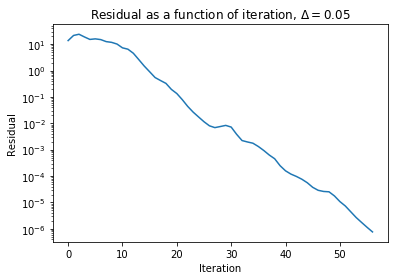

In [7]:
# Plot residual errors
iterations = np.arange(residuals.size)
plt.semilogy(iterations, residuals)
plt.xlabel("Iteration")
plt.ylabel("Residual")
plt.title("Residual as a function of iteration, $\Delta =$" +  str(delta))
plt.show()

The grid defined above is of dimension 20 x 20, so the previous solution can be used to represent a coarse grid. Therefore, the solution is plotted using the $\texttt{matplotlib}$ function $\texttt{pcolor}$. 

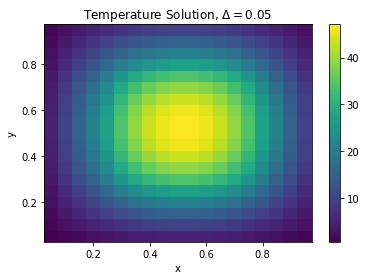

In [8]:
# Define edges for plotting
points = np.linspace(0.5*delta, L-0.5*delta, ndim)

# Create mesh based on edges
X,Y = np.meshgrid(points, points)

# Plot distribution
plt.pcolor(X,Y, np.reshape(x,(ndim,ndim)));
plt.xlabel("x")
plt.ylabel("y")
plt.colorbar()
plt.title("Temperature Solution, $\Delta =$" +  str(delta))
plt.show()

The value of $\Delta$ is then changed to 0.02 to solve for a more fine grid using the previous code. Once the solution is obtained, the grid is again plotted with the residual errors.

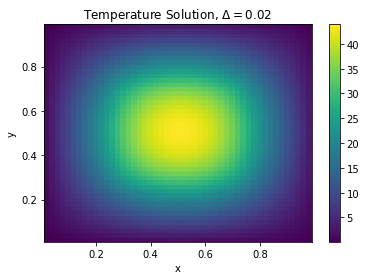

In [10]:
delta = 0.02; # This is changed
L = 1.0;
k = 0.001;
ndim = int(round(L/delta))
nCells = ndim*ndim;
A = np.zeros((nCells,nCells));
b = np.zeros(nCells)
#save us some work for later
idelta2 = 1.0/(delta*delta);

#now fill in A and b
for cellVar in range(nCells):
    xCell = cellVar % ndim; #x % y means x modulo y
    yCell = (cellVar-xCell)//ndim;
    xVal = xCell*delta + 0.5*delta;
    yVal = yCell*delta + 0.5*delta;
    #put source only in the middle of the problem
    if ( ( math.fabs(xVal - L*0.5) < .25*L) and ( math.fabs(yVal - L*0.5) < .25*L) ):
        b[cellVar] = 1;
    #end if
    
    A[cellVar,cellVar] = 4.0*k*idelta2;
    
    if (xCell > 0):
        A[cellVar,ndim*yCell + xCell -1] = -k*idelta2;
    if (xCell < ndim-1):
        A[cellVar,ndim*yCell + xCell + 1] = -k*idelta2;
    if (yCell > 0):
        A[cellVar,ndim*(yCell-1) + xCell] = -k*idelta2;
    if (yCell < ndim-1):
        A[cellVar,ndim*(yCell+1) + xCell] = -k*idelta2;
        
if (nCells <= 20):
    #print the matrix
    print("The A matrix in Ax = b is\n",A)
    
    #print the righthand side
    print("The RHS is",b)
    
x, residuals = CG(A,b,LOUD=False,max_iterations=1000)

# Define edges for plotting
points = np.linspace(0.5*delta, L-0.5*delta, ndim)

# Create mesh based on edges
X,Y = np.meshgrid(points, points)

# Plot distribution
plt.pcolor(X,Y, np.reshape(x,(ndim,ndim)));
plt.xlabel("x")
plt.ylabel("y")
plt.colorbar()
plt.title("Temperature Solution, $\Delta =$" +  str(delta))
plt.show()